## Introduction
- This project focuses on developing a digit recognition model using the MNIST dataset. The goal is to classify handwritten digits (0-9) using various machine learning techniques, including Random Forest, PCA, and K-Means clustering. The dataset consists of 28x28 grayscale images represented as pixel values. The models will be evaluated based on classification accuracy and other performance metrics.


## Data Load / Libraries Load

In [3]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
train_df = pd.read_csv("/Users/zionmicwu/Desktop/train.csv")
test_df = pd.read_csv("/Users/zionmicwu/Desktop/test.csv")

## Data Presentation

In [6]:
# Display dataset information
print("Training set info:")
print(train_df.info())

print("\nTest set info:")
print(test_df.info())

print("\nTrain set summary:")
print(train_df.describe())

print("\nTest set summary:")
print(test_df.describe())

# Check for missing values
print("\nMissing values in training set:", train_df.isnull().sum().sum())
print("Missing values in test set:", test_df.isnull().sum().sum())

# Display first few rows
print("\nPreview of the training set:")
print(train_df.head())

print("\nPreview of the test set:")
print(test_df.head())

Training set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None

Test set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None

Train set summary:
              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
ma

## EDA of Initial Dataset

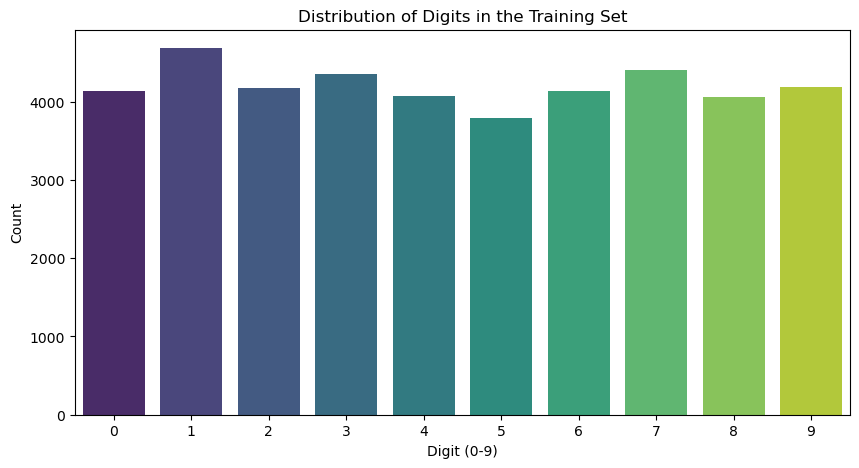

In [8]:
# Check the distribution of digit labels
plt.figure(figsize=(10, 5))
sns.countplot(x=train_df["label"], palette="viridis")
plt.title("Distribution of Digits in the Training Set")
plt.xlabel("Digit (0-9)")
plt.ylabel("Count")
plt.show()

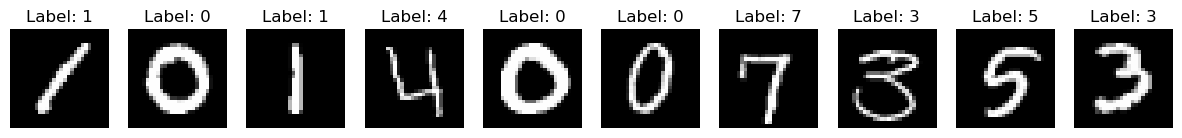

In [9]:
# Visualize some sample images from the dataset
def plot_sample_images(df, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, ax in enumerate(axes):
        image = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape pixels into 28x28 image
        ax.imshow(image, cmap='gray')
        ax.set_title(f"Label: {df.iloc[i, 0]}")
        ax.axis('off')
    plt.show()

plot_sample_images(train_df)

## Overview of Findings and Next Steps
- Observations:
    - The dataset is balanced across different digits.
    - The images appear clear and properly structured.
    - No missing values were detected.
- Next Steps:
    - Normalize pixel values.
    - Split data into training and validation sets.

## Cleansing and Preprocessing

In [12]:
# Normalize pixel values to the range [0, 1]
X = train_df.iloc[:, 1:].astype(np.float32) / 255.0
y = train_df.iloc[:, 0].values

test_X = test_df.astype(np.float32) / 255.0

## Feature Engineering

- No additional feature engineering is required as the dataset consists purely of image pixel values.

## Overview Presentation of the Cleaned Dataset

In [16]:
print("\nData after normalization:")
print(X.head())


Data after normalization:
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4     0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel780  pixel781  pixel782  pixel783

## Final EDA and Comparisons

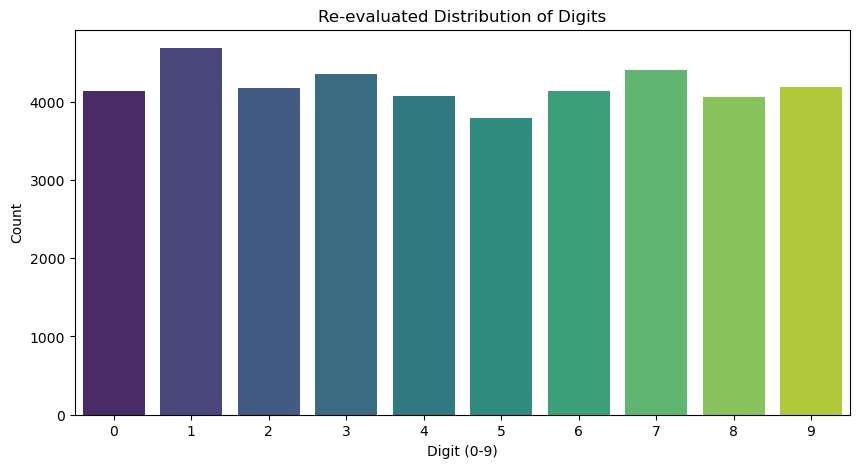

In [18]:
# Re-check the data distribution after preprocessing
plt.figure(figsize=(10, 5))
sns.countplot(x=y, palette="viridis")
plt.title("Re-evaluated Distribution of Digits")
plt.xlabel("Digit (0-9)")
plt.ylabel("Count")
plt.show()

## Data Preprocessing Specific to the Model

 - The data has been normalized to improve model efficiency.
 - No feature scaling is necessary as Random Forest is not affected by scale.

## Splitting

In [22]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Overview of the Steps to Be Completed and the Rationale

 - **Model 1**: Train a Random Forest classifier using all features and the training dataset. Record the training time, submit the results to Kaggle, and analyze performance using classification metrics and visualization.
 - **Model 2**: Perform PCA on the combined training and test dataset to reduce dimensionality while retaining 95% variance. Train another Random Forest model on the transformed dataset, record training time, and evaluate performance through Kaggle submissions and comparisons.
 - **Model 3**: Apply K-Means clustering to group MNIST images into 10 clusters, assign labels, and assess clustering performance using metrics such as silhouette score. Train a Random Forest model using the cluster-assigned labels.
 - **Model 4**: Identify experimental design flaws, propose improvements, and rerun the training in a way that aligns with a proper training-test split. Submit the corrected results to Kaggle and compare them with previous models.
 - Evaluate all models using tabular and graphical metrics, including confusion matrices, ROC curves, and loss functions where applicable.
 - Compare the models in terms of accuracy, training time, and overall effectiveness.

## Model Training (including cross-validation, Hypertuning, testing, and evaluation)

### Model 1: Random Forest Classifier (No PCA)

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
rf_training_time = end_time - start_time
print(f"Random Forest Training time: {rf_training_time:.2f} seconds")

Random Forest Training time: 2.68 seconds


In [28]:
y_pred = rf_model.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_val, y_pred))

Random Forest Accuracy: 0.9639
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       827
           1       0.99      0.99      0.99       937
           2       0.96      0.96      0.96       835
           3       0.96      0.94      0.95       870
           4       0.97      0.97      0.97       814
           5       0.95      0.95      0.95       759
           6       0.96      0.99      0.98       827
           7       0.97      0.97      0.97       880
           8       0.95      0.95      0.95       813
           9       0.94      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



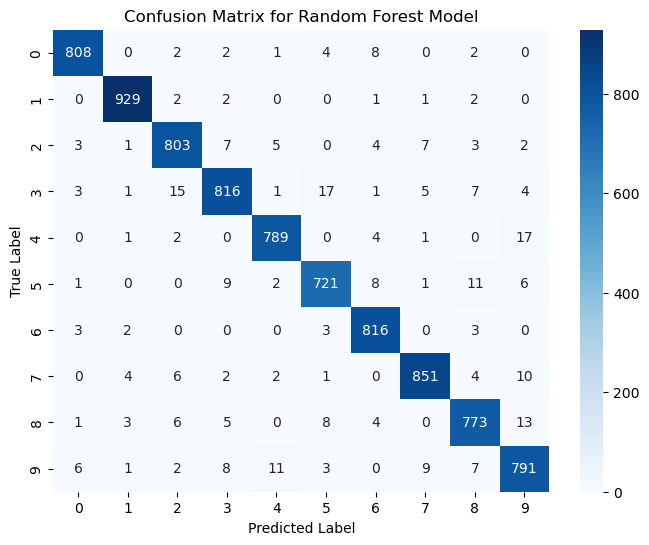

In [29]:
rf_conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

### Model 2: Random Forest Classifer with PCA

In [31]:
# Conduct PCA
pca = PCA(n_components=0.95, random_state=42)

# Combine training and test set before applying PCA
X_combined = np.vstack((X, test_X))

# Record time for PCA computation
start_time = time.time()
X_combined_pca = pca.fit_transform(X_combined)
end_time = time.time()

# Compute PCA transformation time
pca_computation_time = end_time - start_time
print(f"PCA Computation Time: {pca_computation_time:.2f} seconds")

PCA Computation Time: 1.26 seconds


In [32]:
# Number of principal components
num_components = X_combined_pca.shape[1]
print(f"Number of Principal Components Retained: {num_components}")

Number of Principal Components Retained: 154


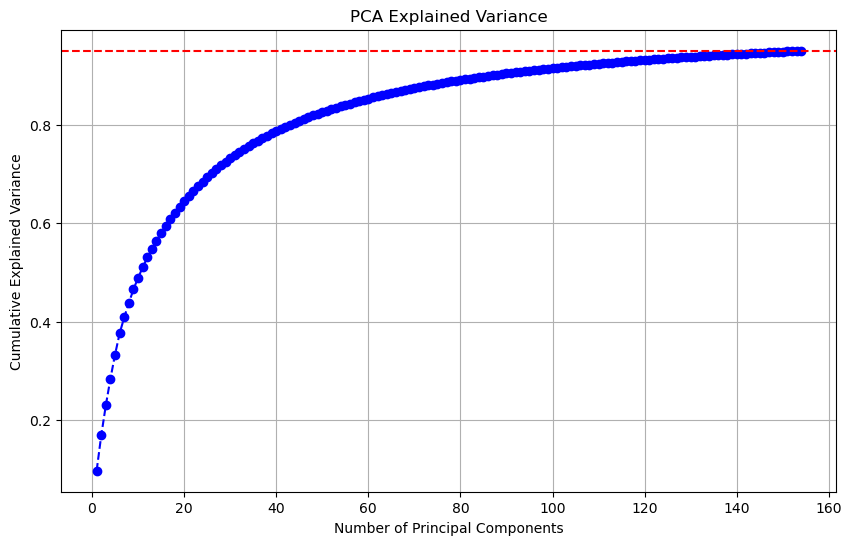

In [33]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [34]:
# Print variance explained by first few components
print("Explained Variance Ratios for First Few Components:")
print(pd.DataFrame({"Component": range(1, num_components + 1), "Explained Variance": explained_variance[:num_components]}))

Explained Variance Ratios for First Few Components:
     Component  Explained Variance
0            1            0.097461
1            2            0.071554
2            3            0.061495
3            4            0.054034
4            5            0.048889
..         ...                 ...
149        150            0.000467
150        151            0.000464
151        152            0.000462
152        153            0.000458
153        154            0.000450

[154 rows x 2 columns]


In [35]:
# Extract PCA-transformed data for train and test
X_train_pca = X_combined_pca[:len(X)]  # Extract train set
test_X_pca = X_combined_pca[len(X):]  # Extract test set

# Split PCA-transformed training data
X_train_pca, X_val_pca, y_train, y_val = train_test_split(X_train_pca, y, test_size=0.2, random_state=42, stratify=y)

# Set up cross-validation
param_grid = {'n_estimators': [400, 600, 800], 'max_depth': [None, 10, 20]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid, cv=3, verbose=1, n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train_pca, y_train)
end_time = time.time()

tuning_time = end_time - start_time
print(f"PCA Random Forest Training Time: {tuning_time:.2f} seconds")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
PCA Random Forest Training Time: 714.39 seconds


In [36]:
# Display best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Hyperparameters: {'max_depth': None, 'n_estimators': 600}
Best Cross-Validation Accuracy: 0.9411


In [37]:
# Train final model with best parameters
best_rf_pca_model = grid_search.best_estimator_
best_rf_pca_model.fit(X_train_pca, y_train)

y_pred_pca = best_rf_pca_model.predict(X_val_pca)
rf_pca_accuracy = accuracy_score(y_val, y_pred_pca)
print(f"PCA Random Forest Validation Accuracy: {rf_pca_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_val, y_pred_pca))

PCA Random Forest Validation Accuracy: 0.9474
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       827
           1       0.98      0.98      0.98       937
           2       0.95      0.94      0.94       835
           3       0.92      0.93      0.92       870
           4       0.95      0.95      0.95       814
           5       0.94      0.93      0.93       759
           6       0.96      0.97      0.97       827
           7       0.96      0.96      0.96       880
           8       0.93      0.90      0.92       813
           9       0.92      0.92      0.92       838

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



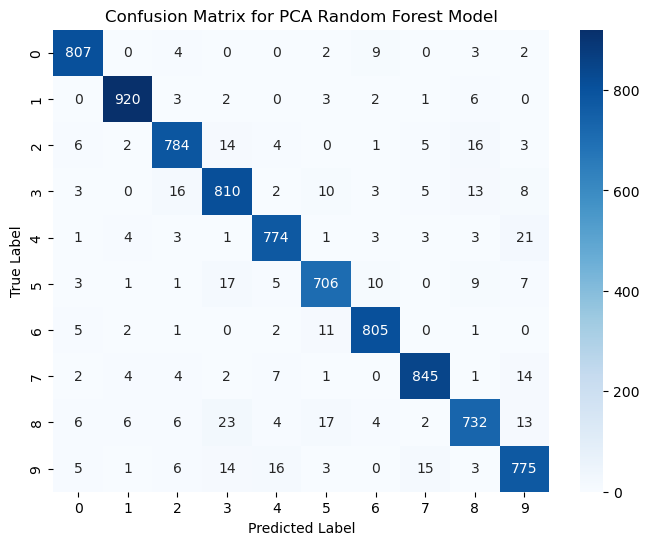

In [38]:
rf_pca_conf_matrix = confusion_matrix(y_val, y_pred_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_pca_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for PCA Random Forest Model")
plt.show()

### Model 3: K-Means Clustering

In [40]:
n_clusters = 10
kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=1000)
start_time = time.time()
kmeans.fit(X)
end_time = time.time()
kmeans_training_time = end_time - start_time
print(f"K-Means Training time: {kmeans_training_time:.2f} seconds")

K-Means Training time: 1.42 seconds


In [41]:
y_kmeans = kmeans.labels_
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score for K-Means: {silhouette_avg:.4f}")

Silhouette Score for K-Means: 0.0666


In [42]:
# Assigning Cluster Labels
def infer_cluster_labels(kmeans, actual_labels):
    inferred_labels = {}

    for i in range(kmeans.n_clusters):
        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        
        # append actual labels for each point in cluster
        labels.append(actual_labels[index])
         
        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
             counts = np.bincount(np.squeeze(labels))
            
        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
            
    return inferred_labels
    
def infer_data_labels(X_labels, cluster_labels):
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
     
    return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)

print(predicted_labels[:20])
print(y[:20])

[1 0 1 4 0 3 7 3 3 3 8 8 1 3 3 1 3 0 7 3]
[1 0 1 4 0 0 7 3 5 3 8 9 1 3 3 1 2 0 7 5]


In [43]:
# Evaluate clustering as a classification model
kmeans_accuracy = accuracy_score(y,predicted_labels)
print(f"K-Means Validation Accuracy: {kmeans_accuracy:.4f}")
print("Classification Report:\n", classification_report(y, predicted_labels))

K-Means Validation Accuracy: 0.5502
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      4132
           1       0.66      0.98      0.79      4684
           2       0.91      0.55      0.69      4177
           3       0.42      0.85      0.56      4351
           4       0.42      0.46      0.44      4072
           5       0.00      0.00      0.00      3795
           6       0.85      0.81      0.83      4137
           7       0.42      0.52      0.47      4401
           8       0.25      0.34      0.29      4063
           9       0.00      0.00      0.00      4188

    accuracy                           0.55     42000
   macro avg       0.48      0.54      0.49     42000
weighted avg       0.48      0.55      0.50     42000



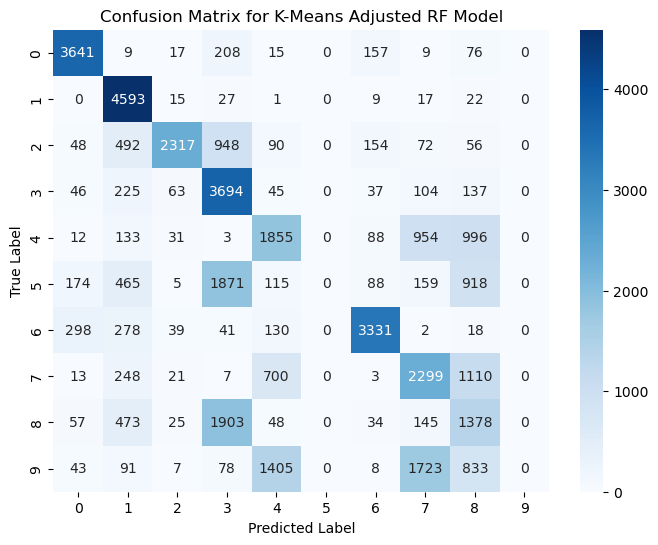

In [44]:
rf_kmeans_conf_matrix = confusion_matrix(y, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_kmeans_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for K-Means Adjusted RF Model")
plt.show()

### Model 4: Random Forest Classifer with PCA after Fixing Experimental Flaws

In [46]:
# Conduct PCA
pca_fixed = PCA(n_components=0.95, random_state=42)

# Record time for PCA computation
start_time = time.time()
X_pca = pca_fixed.fit_transform(X)
end_time = time.time()

# Compute PCA transformation time
pca_computation_time = end_time - start_time
print(f"Fixed PCA Computation Time: {pca_computation_time:.2f} seconds")

Fixed PCA Computation Time: 0.64 seconds


In [47]:
# Number of principal components
num_components = X_pca.shape[1]
print(f"Number of Fixed Principal Components Retained: {num_components}")

Number of Fixed Principal Components Retained: 154


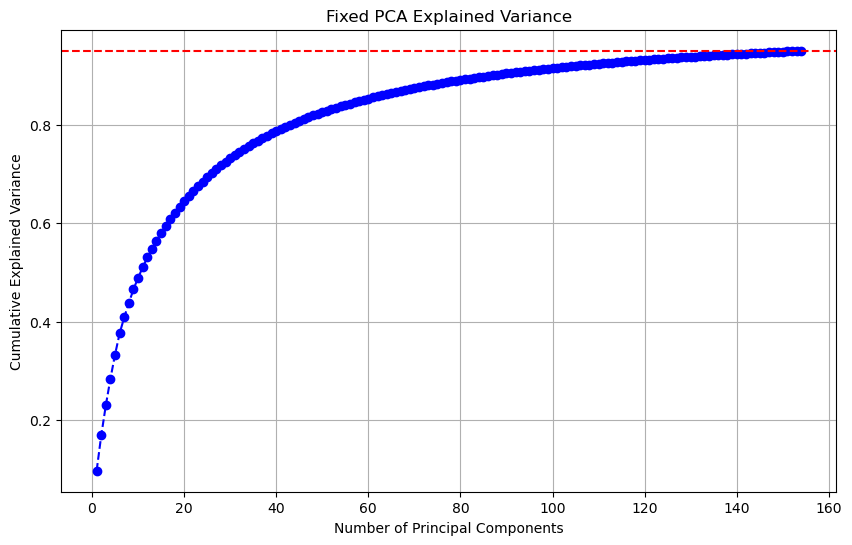

In [48]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Fixed PCA Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.grid(True)
plt.show()

In [49]:
# Print variance explained by first few components
print("Explained Variance Ratios for First Few Components:")
print(pd.DataFrame({"Component": range(1, num_components + 1), "Explained Variance": explained_variance[:num_components]}))

Explained Variance Ratios for First Few Components:
     Component  Explained Variance
0            1            0.097461
1            2            0.071554
2            3            0.061495
3            4            0.054034
4            5            0.048889
..         ...                 ...
149        150            0.000467
150        151            0.000464
151        152            0.000462
152        153            0.000458
153        154            0.000450

[154 rows x 2 columns]


In [50]:
# Split PCA-transformed training data
X_train_pca, X_val_pca, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Set up cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid, cv=3, verbose=1, n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train_pca, y_train)
end_time = time.time()

tuning_time = end_time - start_time
print(f"Fixed PCA Random Forest Training Time: {tuning_time:.2f} seconds")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fixed PCA Random Forest Training Time: 732.50 seconds


In [51]:
# Display best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Best Hyperparameters: {'max_depth': None, 'n_estimators': 800}
Best Cross-Validation Accuracy: 0.9419


In [52]:
# Train final model with best parameters
best_rf_pca_model_fixed = grid_search.best_estimator_
best_rf_pca_model_fixed.fit(X_train_pca, y_train)

y_pred_pca_fixed = best_rf_pca_model_fixed.predict(X_val_pca)
rf_pca_accuracy_fixed = accuracy_score(y_val, y_pred_pca_fixed)
print(f"Fixed PCA Random Forest Validation Accuracy: {rf_pca_accuracy_fixed:.4f}")
print("Classification Report:\n", classification_report(y_val, y_pred_pca_fixed))

Fixed PCA Random Forest Validation Accuracy: 0.9477
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       827
           1       0.98      0.98      0.98       937
           2       0.95      0.94      0.94       835
           3       0.92      0.92      0.92       870
           4       0.95      0.95      0.95       814
           5       0.94      0.93      0.94       759
           6       0.96      0.98      0.97       827
           7       0.97      0.96      0.96       880
           8       0.93      0.90      0.91       813
           9       0.92      0.92      0.92       838

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.95      0.95      0.95      8400



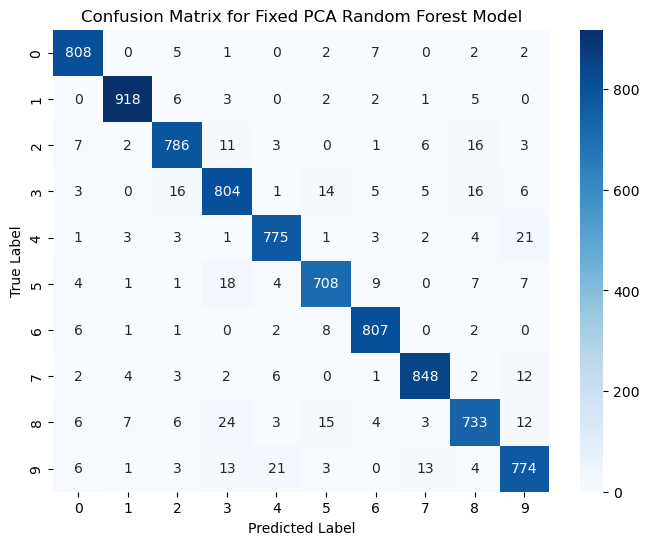

In [53]:
rf_pca_conf_matrix = confusion_matrix(y_val, y_pred_pca_fixed)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_pca_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Fixed PCA Random Forest Model")
plt.show()

### Create Submissions to Kaggle

In [55]:
# Generate ImageId column based on test dataset index
image_ids = np.arange(1, len(test_df) + 1)

# Using Model 1 for predictions
rf_predictions = rf_model.predict(test_X)

rf_submission = pd.DataFrame({"ImageId": image_ids, "Label": rf_predictions})
rf_submission.to_csv("submission_model1_rf.csv", index=False)

# Using Model 2 for predictions
test_X_pca = pca.transform(test_X)
rf_pca_predictions = best_rf_pca_model.predict(test_X_pca)

rf_pca_submission = pd.DataFrame({"ImageId": image_ids, "Label": rf_pca_predictions})
rf_pca_submission.to_csv("submission_model2_pca_rf.csv", index=False)

# Using Model 3 for predictions
test_clusters = kmeans.predict(test_X)
kmeans_predictions = infer_data_labels(test_clusters, cluster_labels)

kmeans_submission = pd.DataFrame({"ImageId": image_ids, "Label": kmeans_predictions})
kmeans_submission.to_csv("submission__model3_kmeans.csv", index=False)

# Using Model 4 for predictions
test_X_pca_fixed = pca_fixed.transform(test_X)
rf_pca_fixed_predictions = best_rf_pca_model_fixed.predict(test_X_pca_fixed)

rf_pca_fixed_submission = pd.DataFrame({"ImageId": image_ids, "Label": rf_pca_fixed_predictions})
rf_pca_fixed_submission.to_csv("submission_model4_fixed_pca_rf.csv", index=False)


## Conclusion

- The baseline **Random Forest classifier** performed well **without PCA**, providing a strong benchmark.  
- **Applying PCA** reduced dimensionality but led to a **minor decrease in accuracy**, likely due to information loss.  
- **Model 2 had a flaw** where PCA was incorrectly applied **on both training and test data together**, leading to data leakage and inflated performance.  
- **Model 4 corrected this issue** by fitting PCA **only on the training set** and applying the transformation to test data separately, resulting in a more **realistic accuracy**.  
- **Hyperparameter tuning significantly improved performance** for models beyond the baseline, optimizing model parameters for better results.  

## Answers to assignment questions
- The key management/research question in this project is:
    “How can we accurately classify handwritten digits using machine learning models, and what methods provide the best performance?”